In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
imgid=['img'+str(i) for i in range(1,41)] # 40 images
imgType=['Type1']*10+['Type2']*10+['Type3']*10+['Type4']*10 # 4 types of images
group=['Group1']*40+['Group2']*40+['Group3']*40 # 3 groups of raters

In [16]:
#create 3 separate shuffles of rankings into one list
rankings1=np.arange(1,41)
rankings2=np.arange(1,41)
rankings3=np.arange(1,41)
#shuffle
rankings1[10:]=np.random.permutation(rankings1[10:])
rankings2[20:]=np.random.permutation(rankings2[20:])
rankings3=np.random.permutation(rankings3)
#combine
rankings=np.concatenate((rankings1,rankings2,rankings3),axis=0)

In [17]:
#combine into one dataframe
df=pd.DataFrame({'group':group,
              'imgType':np.tile(imgType,3),
              'imgid':np.tile(imgid,3),
              'rankings': rankings})

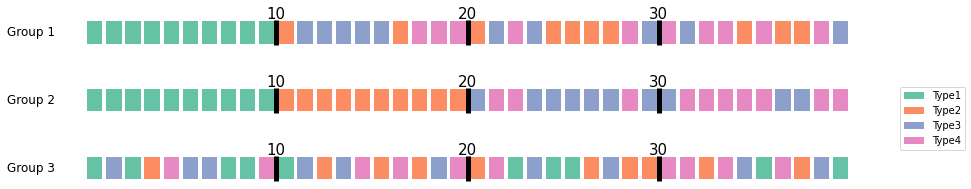

In [20]:
groups = ['Group1', 'Group2', 'Group3'] 
fig, axes = plt.subplots(3, 1, figsize=(15, 3), sharey=True) #sharey=True means all subplots share the same y-axis
fig.subplots_adjust(hspace=1.5) #add padding between subplots

for i, group in enumerate(groups): 
    ax = axes[i] #select subplot
    data = df[df['group'] == group] #select data for group
    sns.countplot(x='rankings', data=data, hue='imgType', palette='Set2', saturation=1, dodge=False, ax=ax) #plot
    ax.axis('off')#remove axes
    ax.legend_.remove() #remove legend for all subplots
    ax.vlines(x=[9.5, 19.5, 29.5], ymin=-0.05, ymax=1.05, color='black', linewidth=5) #add markers
    #labels of ranks
    ax.annotate('10', xy=(9, 1.1), xytext=(9, 1.1), fontsize=15)
    ax.annotate('20', xy=(19, 1.1), xytext=(19, 1.1), fontsize=15)
    ax.annotate('30', xy=(29, 1.1), xytext=(29, 1.1), fontsize=15)
    #title
    ax.text(-0.05, 0.5, f'Group {i+1}', transform=ax.transAxes, rotation=0, va='center', fontsize=12)  #added as text to give more control over position, transform=ax.transAxes means coordinates are relative to axes, not data


axes[2].legend(loc='lower right', bbox_to_anchor=(1.1, 1)) #add one legend

plt.show()